In [1]:
import pip
def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])   

import_or_install('importlib')
import_or_install('sys')
import_or_install('os')
import_or_install('pandas')
import_or_install('importlib')
import_or_install("numpy")
import_or_install("matplotlib")
import_or_install("sklearn")
import_or_install("pandas_market_calendars")
import_or_install("scipy")
import_or_install("datetime")
import_or_install("dateutil")

import importlib
import sys
import os,sys
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))

In [2]:

import importlib
import numpy as np
import pandas as pd
import TradingStrategy as ts
import Common.ApiClient as ac
import MA.ExponentialMovingAverageStrategy as ema
import MA.SimpleMovingAverageStrategy as sma

pd.options.mode.chained_assignment = None 
importlib.reload(ts)
importlib.reload(ac)
importlib.reload(ema)
importlib.reload(sma)


<module 'MA.SimpleMovingAverageStrategy' from 'd:\\UW\\EE 596\\stock-ml-mini-project\\src\\MA\\SimpleMovingAverageStrategy.py'>

In [3]:
Api_Key =''
Secret_Key=''
endpoint='https://paper-api.alpaca.markets'

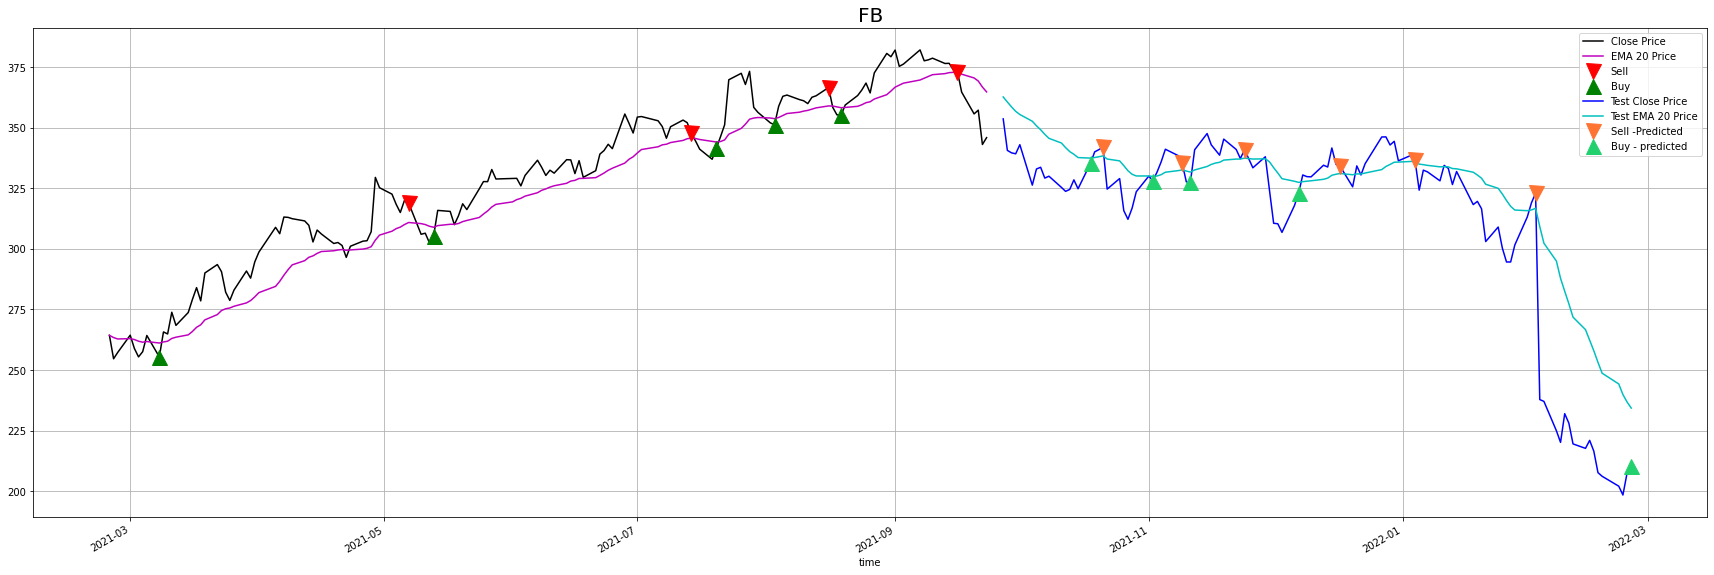

Buy and hold strategy returns for the backtest: -51.89999999999999
EMA based model strategy returns for the backtest: 11.4


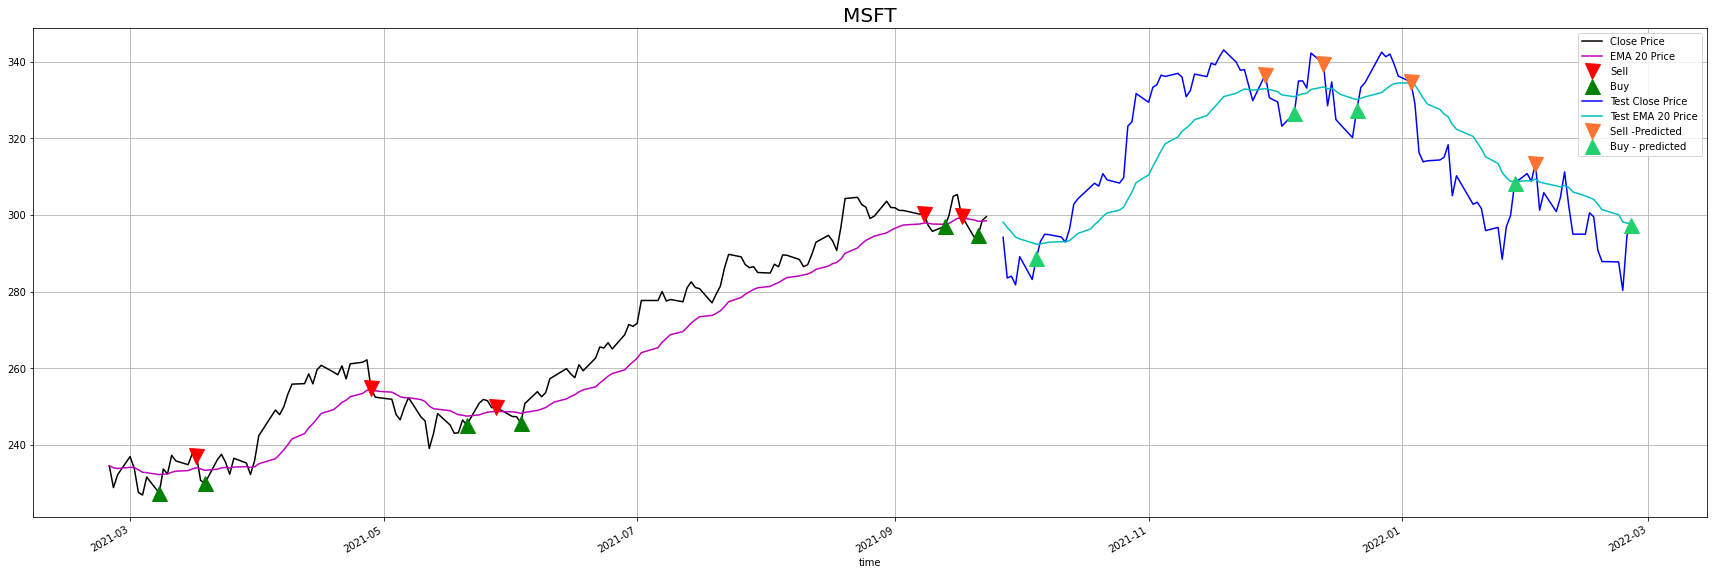

Buy and hold strategy returns for the backtest: -0.39999999999999986
EMA based model strategy returns for the backtest: 23.1


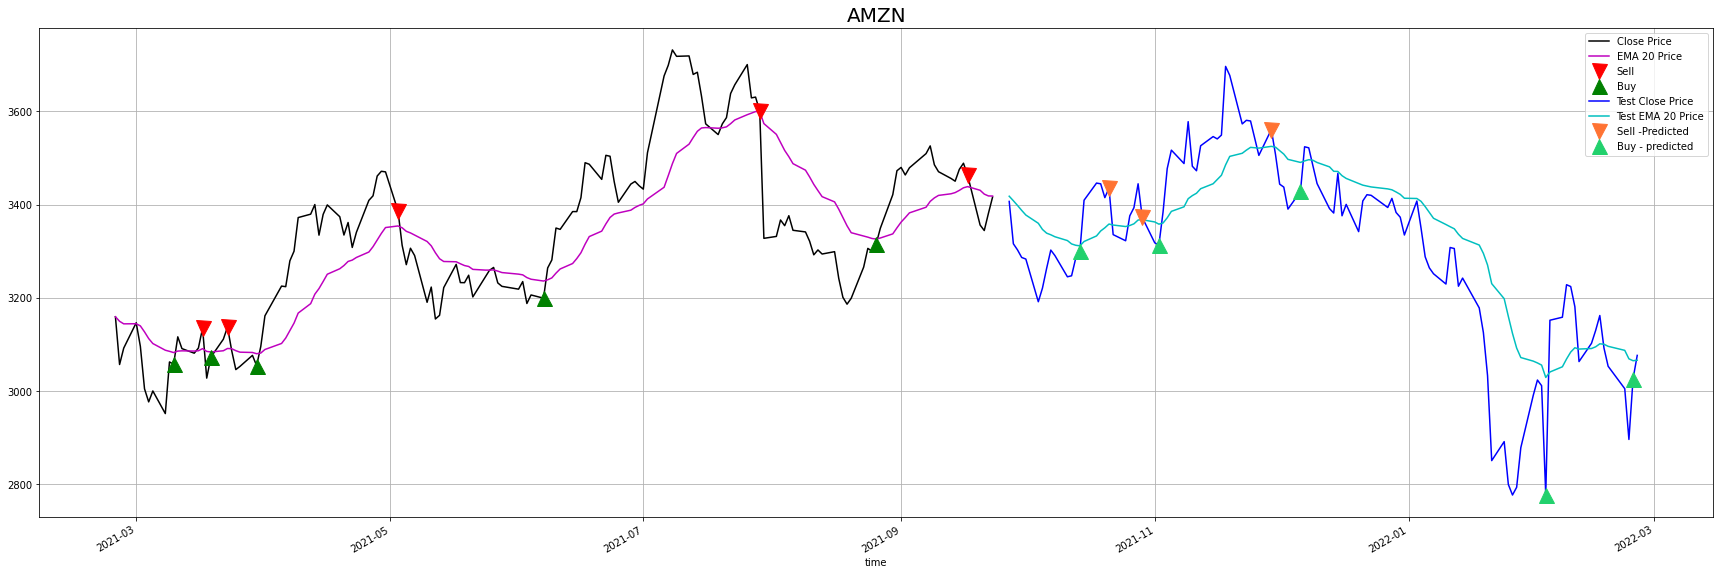

PermissionError: [Errno 13] Permission denied: 'AMZN-whatsup.csv'

In [4]:

client = ac.ApiClient(api_key_Id=Api_Key,api_key_secret=Secret_Key)


for ticker in ["FB","MSFT","AMZN","AMD","GOOG"]:
    df= client. get_closing_price(ticker,255)
    ema_instance = ema.ExponentialMovingAverageStrategy(df=df,ticker=ticker) # you can replace this with SimpleMovingAverage
    test, pred=ema_instance.generate_train_model(ticker=ticker)
    # sanitized =sanitize(test)
    # df_final=calc_profit(sanitized).head(20)
    #client.save_to_csv(test,f"{ticker}-whatsup.csv")
    print(f'Buy and hold strategy returns for the backtest: {test["daily_profit"].sum()*100}')
    print(f'EMA based model strategy returns for the backtest: {test["strategy_profit"].sum()*100}')

 

